In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('salaryage.csv')

In [3]:
#Data information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          22 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       28 non-null     float64
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB
None
           Index        Age     Rating  Established
count  29.000000  22.000000  28.000000    29.000000
mean   14.000000  39.045455   3.528571  1638.620690
std     8.514693  16.134781   2.825133   762.079599
min     0.000000  13.000000  -1.000000    -1.000000
25%     7.000000  25.000000   1.050000  1935.000000
50%    14.000000  39.500000   4.200000  1984.000000
75%    21.000000  50.000000   5.400000  1999.000000
max    28.000000  66.000000   7.80000

In [4]:
print(df.isnull().sum())

Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


In [5]:
print('Few samples of the dataset are: ')
print(df.head(5))

Few samples of the dataset are: 
   Index   Age     Salary  Rating       Location  Established Easy Apply
0      0  44.0  $44k-$99k     5.4       India,In         1999       TRUE
1      1  66.0  $55k-$66k     3.5    New York,Ny         2002       TRUE
2      2   NaN  $77k-$89k    -1.0    New York,Ny           -1         -1
3      3  64.0  $44k-$99k     4.4       India In         1988         -1
4      4  25.0  $44k-$99k     6.4  Australia Aus         2002         -1


CLEAN AND PREPROCESS DATASET

In [6]:
#handle missing values of age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [7]:
print(df.Age.isnull().sum())

0


In [8]:
# Cleaning the established column
df["Established"] = df["Established"].replace(-1,np.nan)
df["Established"].fillna('Unknown', inplace=True)

In [9]:
# Cleaning the rating columns and replacing special character with Nan values
df['Rating'] = df["Rating"].replace(-1,np.nan)
# Now replace the those nan values with the rating mean()
df['Rating'] = df["Rating"].fillna(df['Rating'].mean()).round(decimals=1)

In [10]:
#Cleaning the easy_apply
df['Easy Apply'] = df['Easy Apply'].replace("-1", "True")

In [11]:
df

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999.0,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002.0,TRUE
2,2,39.5,$77k-$89k,4.3,"New York,Ny",Unknown,True
3,3,64.0,$44k-$99k,4.4,India In,1988.0,True
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002.0,True
5,5,44.0,$77k-$89k,1.4,"India,In",1999.0,TRUE
6,6,21.0,$44k-$99k,0.0,"New York,Ny",Unknown,True
7,7,44.0,$44k-$99k,4.3,Australia Aus,Unknown,True
8,8,35.0,$44k-$99k,5.4,"New York,Ny",Unknown,True
9,9,22.0,$44k-$99k,7.7,"India,In",Unknown,TRUE


In [12]:
df.Location.astype

<bound method NDFrame.astype of 0          India,In
1       New York,Ny
2       New York,Ny
3          India In
4     Australia Aus
5          India,In
6       New York,Ny
7     Australia Aus
8       New York,Ny
9          India,In
10         India,In
11         India,In
12         India,In
13    Australia Aus
14    Australia Aus
15    Australia Aus
16         India,In
17      New York,Ny
18      New York,Ny
19      New York,Ny
20      New York,Ny
21      New York,Ny
22      New York,Ny
23      New York,Ny
24      New York,Ny
25    Australia Aus
26         India,In
27         India,In
28    Australia Aus
Name: Location, dtype: object>

STANDARDIZING THE LOCATION

In [13]:
df['Location']= df['Location'].str.replace("Australia Aus", "Australia, Aus")
df['Location']= df['Location'].str.replace("India In", "India, In")

In [14]:
df['location_city'] = df['Location'].str.split(",", expand=True).get(0)
df['city_sign'] = df['Location'].str.split(",", expand=True).get(1)

In [15]:
df

,Index,Age,Salary,Rating,Location,Established,Easy Apply,location_city,city_sign
0,0,44.0,$44k-$99k,5.4,"India,In",1999.0,TRUE,India,In
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002.0,TRUE,New York,Ny
2,2,39.5,$77k-$89k,4.3,"New York,Ny",Unknown,True,New York,Ny
3,3,64.0,$44k-$99k,4.4,"India, In",1988.0,True,India,In
4,4,25.0,$44k-$99k,6.4,"Australia, Aus",2002.0,True,Australia,Aus
5,5,44.0,$77k-$89k,1.4,"India,In",1999.0,TRUE,India,In
6,6,21.0,$44k-$99k,0.0,"New York,Ny",Unknown,True,New York,Ny
7,7,44.0,$44k-$99k,4.3,"Australia, Aus",Unknown,True,Australia,Aus
8,8,35.0,$44k-$99k,5.4,"New York,Ny",Unknown,True,New York,Ny
9,9,22.0,$44k-$99k,7.7,"India,In",Unknown,TRUE,India,In


In [16]:
df.drop('Location', inplace=True, axis=1)

df['location_city'] = df['location'].str.split(",", expand=True).get(0): Splits the location column at each comma and takes the first part (city name) into a new column location_city

df['city_sign'] = df['location'].str.split(",", expand=True).get(1): Splits the location column at each comma and takes the second part (city abbreviation) into a new column city_sign


This line drops the original location column from the DataFrame as it's no longer needed after splitting the information into location_city and city_sign.

In [17]:
def parse_salary(Salary):
    salary_range = Salary.replace('k', '').replace('$', '').split('-')
    return (int(salary_range[0]) + int(salary_range[1])) / 2

df['Salary'] = df['Salary'].apply(parse_salary)

Function Definition: def parse_salary(salary): defines a function named parse_salary that takes a single argument salary.
        
Removing 'k' and '$' Characters: salary.replace('k', '').replace('$', '') removes the characters 'k' and '$' from the salary string. This is done so that we are left with just the numerical parts of the range.

Splitting the Range: .split('-') splits the modified string into a list of two elements at the hyphen.
For example, if salary is "$44k-$99k", after the replacements and split, salary_range will be ['44', '99'].

Calculating the Average: return (int(salary_range[0]) + int(salary_range[1])) / 2 converts the two elements of the list from strings to integers, sums them, and divides by 2 to get the average salary.
For ['44', '99'], this would be (44 + 99) / 2 = 71.5.

Applying the parse_salary Function to the Salary Column

In [18]:
#final cleaned data
df

,Index,Age,Salary,Rating,Established,Easy Apply,location_city,city_sign
0,0,44.0,71.5,5.4,1999.0,TRUE,India,In
1,1,66.0,60.5,3.5,2002.0,TRUE,New York,Ny
2,2,39.5,83.0,4.3,Unknown,True,New York,Ny
3,3,64.0,71.5,4.4,1988.0,True,India,In
4,4,25.0,71.5,6.4,2002.0,True,Australia,Aus
5,5,44.0,83.0,1.4,1999.0,TRUE,India,In
6,6,21.0,71.5,0.0,Unknown,True,New York,Ny
7,7,44.0,71.5,4.3,Unknown,True,Australia,Aus
8,8,35.0,71.5,5.4,Unknown,True,New York,Ny
9,9,22.0,71.5,7.7,Unknown,TRUE,India,In


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Summary Statistics
print(df.describe())

           Index        Age     Salary     Rating
count  29.000000  29.000000  29.000000  29.000000
mean   14.000000  39.155172  67.327586   4.286207
std     8.514693  13.974533  14.647815   2.068423
min     0.000000  13.000000  29.500000   0.000000
25%     7.000000  32.000000  71.500000   3.400000
50%    14.000000  39.500000  71.500000   4.300000
75%    21.000000  44.000000  71.500000   5.400000
max    28.000000  66.000000  94.500000   7.800000


Text(0.5, 1.0, 'Distribution of Age')

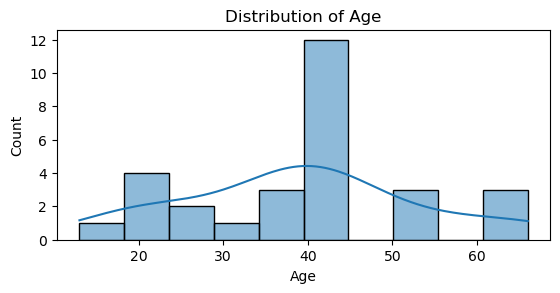

In [21]:
plt.figure(figsize=(14, 6))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Rating')

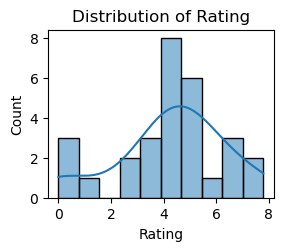

In [22]:
# Rating Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of Rating')

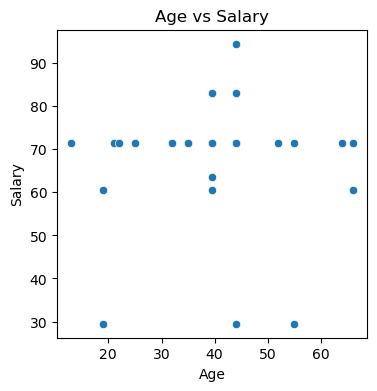

In [23]:
# Scatter plot for Age vs Salary
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Age vs Salary')
plt.show()

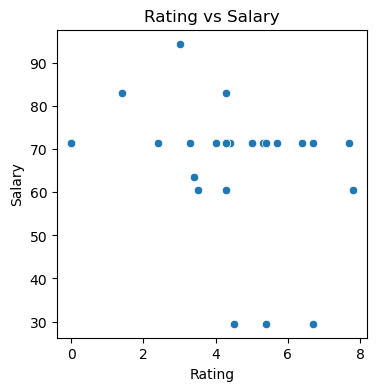

In [24]:
# Scatter plot for Rating vs Salary
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='Rating', y='Salary')
plt.title('Rating vs Salary')
plt.show()

LINEAR REGRESSION SALARY PREDICTION USING AGE AND RATINGS

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Selecting features and target variable
X = df[['Age', 'Rating']]
y = df['Salary']

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [30]:
# Predict salary for Age 44 and Rating 1.4
new_data = pd.DataFrame({'Age': [44], 'Rating': [1.4]})
predicted_salary = model.predict(new_data)

print(f"Predicted Salary for Age 44 and Rating 1.4: {predicted_salary[0]}")

Predicted Salary for Age 44 and Rating 1.4: 75.73531152380312


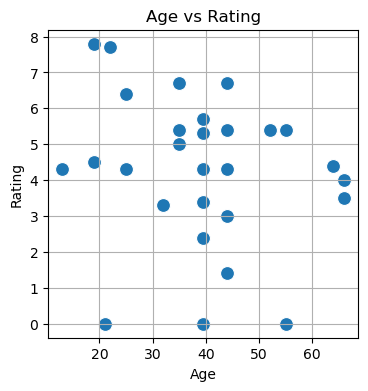

In [31]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, x='Age', y='Rating', s=100)
plt.title('Age vs Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [32]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 355.49807540023954


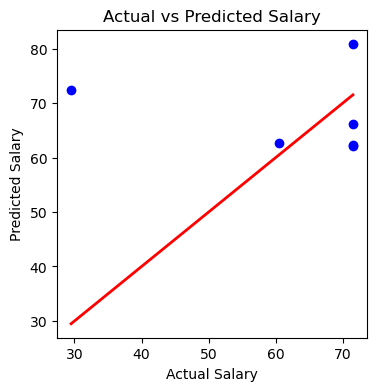

In [33]:
# Scatter plot for actual vs predicted salaries
plt.figure(figsize=(4,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()